# Machine Learning : Activity 2 - Logistic Regression

### Importing libraries

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sn

### Reading the dataset

In [9]:
df = pd.read_csv('dataset.csv')
col_names = df.columns.tolist()
col_names

['admit', 'gre', 'gpa', 'rank']

In [10]:
df.isnull().sum()

admit    0
gre      0
gpa      0
rank     0
dtype: int64

### Splitting the dataset to train and test

In [18]:
x = df[['gre', 'gpa', 'rank']]
y = df['admit']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)
display(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(320, 3)

(320,)

(80, 3)

(80,)

### Fitting the model

In [19]:
model = LogisticRegression(solver='lbfgs', max_iter=1000)
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

### Evaluating Metrics

In [24]:
conf_mat = metrics.confusion_matrix(y_test,y_pred)
print('Confusion Matrix : \n', conf_mat)
acc_score = metrics.accuracy_score(y_test,y_pred)
print('Accuracy : ', acc_score)
print('Acc in % : ', int(acc_score*100),'%')

Confusion Matrix : 
 [[51  2]
 [25  2]]
Accuracy :  0.6625
Acc in % :  66 %


### Visualizing confusion matrix heat map

<Axes: xlabel='Predicted', ylabel='Actual'>

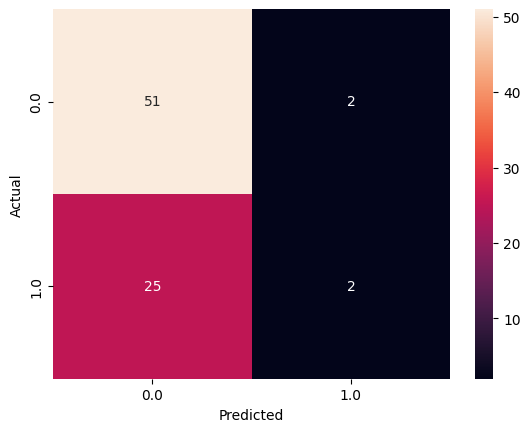

In [21]:
conf_mat = pd.crosstab(y_test,y_pred,rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(conf_mat, annot=True)